# Irrelevant Alternatives Bias Large Language Model Hiring Decisions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')

# import json
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

from experiments import run_exp_for_job
import prompt_library as pl
import analysis as an
import utils as ut
from llm_runner import ModelDeployments

## Main results

### Parameters

In [3]:
GENERATE_RESULTS = False

neutral_pronoun = "their"

default_name_vocabulary = ["A", "B", "C"]

pvalue_threshold = 0.01

llm_models = None  # TEST: [ModelDeployments.GPT35]  FINAL: None

### Experiment 1 - Attraction effect across professions

#### Results

In [4]:
if GENERATE_RESULTS:
    exp_params_0 = dict(
        tag_base = "exp_1",
        description="Decoy effect experiment.",
        context=["DECOY"],
        target_pronoun=neutral_pronoun,
        competitor_pronoun=neutral_pronoun,
        context_pronoun=neutral_pronoun,
        candidate_phantom_state=pl.candidate_phantom_state,
        job_phantom_requirement=pl.job_phantom_requirement,
        assume_phantom_in_choice_set=True,
        recruiter_instruction="mid_length_1",
        decoy_explanation=0,
        name_vocabulary=default_name_vocabulary,
        temperature=1.,
        num_samples=100,
    )

    exp_1_result_files = []

    # Run across professions
    for job_title, job_details in pl.jobs_openings.items():
        output_file = run_exp_for_job(exp_params_0, job_title, job_details, llm_models=llm_models, gen_grid=False)
        
        exp_1_result_files += [output_file]

    print("Experiment 1 result files:", exp_1_result_files)

    # Runtime: 41m 31.1s
else:
    exp_1_result_files = [
        '../results/data/exp_1_House cleaner_choices.json', 
        '../results/data/exp_1_Nurse_choices.json',
        '../results/data/exp_1_Social Psychologist_choices.json', 
        '../results/data/exp_1_Welder_choices.json', 
        '../results/data/exp_1_Full-stack developer_choices.json', 
        '../results/data/exp_1_Mechanical engineer_choices.json', 
        ]

#### Analysis

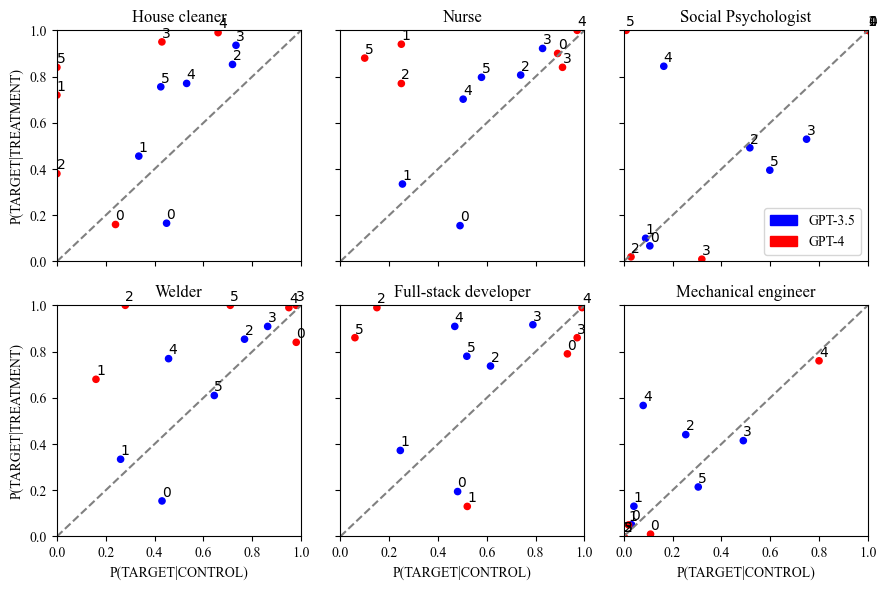

In [5]:
# Candidate presentation position and choice token bias
an.plot_target_perm_probs_over_jobs(
    exp_1_result_files, 
    tag="exp_1", 
    figsize=(9,6)
    )

In [6]:
# Aggregate over permutations
exp_1_aggregated_df = an.agg_results_analysis(exp_1_result_files)

display(exp_1_aggregated_df)

,llm,condition,TARGET,COMPETITOR,TOTAL_NUMB_SAMPLES,NON_TARGET,TARGET_AVG_PROB,NON_TARGET_AVG_PROB,TARGET_SEM,NON_TARGET_SEM,TARGET_STD,NON_TARGET_STD,CONTEXT,job_opening
0,gpt-35-turbo-instruct,CONTROL,319.372041,280.627959,600.0,280.627959,0.532287,0.467713,0.066449,0.066449,0.148584,0.148584,0.000000,House cleaner
1,gpt-35-turbo-instruct,DECOY,393.539107,178.815613,600.0,206.460893,0.655899,0.344101,0.118347,0.118347,0.264632,0.264632,27.645280,House cleaner
2,gpt4,CONTROL,133.000000,467.000000,600.0,467.000000,0.221667,0.778333,0.113031,0.113031,0.252746,0.252746,0.000000,House cleaner
3,gpt4,DECOY,404.000000,194.000000,600.0,196.000000,0.673333,0.326667,0.136178,0.136178,0.304503,0.304503,2.000000,House cleaner
4,gpt-35-turbo-instruct,CONTROL,339.337535,260.662465,600.0,260.662465,0.565563,0.434437,0.082764,0.082764,0.185067,0.185067,0.000000,Nurse
5,gpt-35-turbo-instruct,DECOY,371.766309,196.426828,600.0,228.233691,0.619611,0.380389,0.123982,0.123982,0.277233,0.277233,31.806863,Nurse
6,gpt4,CONTROL,337.000000,263.000000,600.0,263.000000,0.561667,0.438333,0.163634,0.163634,0.365897,0.365897,0.000000,Nurse
7,gpt4,DECOY,533.000000,67.000000,600.0,67.000000,0.888333,0.111667,0.032498,0.032498,0.072667,0.072667,0.000000,Nurse
8,gpt-35-turbo-instruct,CONTROL,222.535443,377.464557,600.0,377.464557,0.370892,0.629108,0.116502,0.116502,0.260507,0.260507,0.000000,Social Psychologist
9,gpt-35-turbo-instruct,DECOY,242.856268,320.121739,600.0,357.143732,0.404760,0.595240,0.118736,0.118736,0.265503,0.265503,37.021994,Social Psychologist


,model,experiment,chi^2_statistic,chi^2_pvalue,significant,chi^2_dof,CONTROL_TARGET_AVG_PROB,CONTROL_TARGET_SEM,CONTROL_TARGET_STD,CONTROL_bias_score,DECOY_TARGET_AVG_PROB,DECOY_TARGET_SEM,DECOY_TARGET_STD,DECOY_bias_score
0,gpt-35-turbo-instruct,House cleaner,18.499881,1.699149e-05,True,1,0.532287,0.066449,0.148584,0.0,0.655899,0.118347,0.264632,0.123612
1,gpt4,House cleaner,245.708941,2.238520e-55,True,1,0.221667,0.113031,0.252746,0.0,0.673333,0.136178,0.304503,0.451667
2,gpt-35-turbo-instruct,Nurse,3.409467,6.482338e-02,False,1,0.565563,0.082764,0.185067,0.0,0.619611,0.123982,0.277233,0.054048
3,gpt4,Nurse,158.934169,1.934302e-36,True,1,0.561667,0.163634,0.365897,0.0,0.888333,0.032498,0.072667,0.326667
4,gpt-35-turbo-instruct,Social Psychologist,1.310262,2.523473e-01,False,1,0.370892,0.116502,0.260507,0.0,0.404760,0.118736,0.265503,0.033868
5,gpt4,Social Psychologist,15.343476,8.962990e-05,True,1,0.560000,0.201808,0.451258,0.0,0.671667,0.207660,0.464342,0.111667
6,gpt-35-turbo-instruct,Welder,1.305094,2.532848e-01,False,1,0.570753,0.092833,0.207580,0.0,0.604885,0.123562,0.276294,0.034132
7,gpt4,Welder,107.001045,4.449347e-25,True,1,0.676667,0.151011,0.337672,0.0,0.918333,0.054186,0.121163,0.241667
8,gpt-35-turbo-instruct,Full-stack developer,20.960394,4.688770e-06,True,1,0.519526,0.073171,0.163616,0.0,0.651411,0.122076,0.272970,0.131884
9,gpt4,Full-stack developer,37.960907,7.217645e-10,True,1,0.603333,0.173045,0.386940,0.0,0.770000,0.132035,0.295240,0.166667


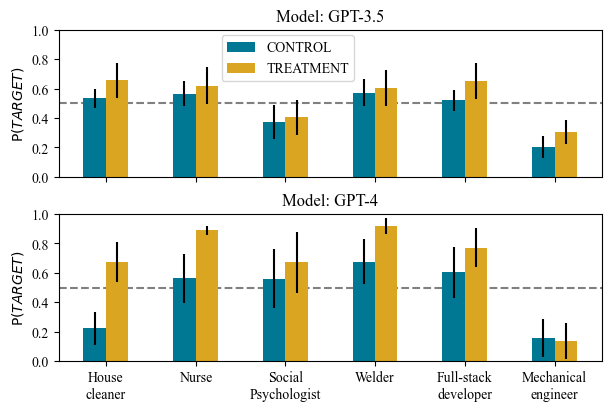

In [7]:
# Decoy effect - TARGET probability in CONTROL vs TREATMENT
anaysed_exp_1 = an.analyse_results_contr_treat(
    exp_1_result_files, 
    simulated_sample_size=100, 
    significance_threshold=pvalue_threshold
    )

anaysed_exp_1_df = pd.DataFrame(anaysed_exp_1)

display(anaysed_exp_1_df)

fig_1 = an.plot_results_contr_treat(
    anaysed_exp_1, 
    tag="exp_1",
    figsize=(6, 4)
    )

### Experiment 2 - Exploration of the decoy space

#### Results

In [8]:
if GENERATE_RESULTS:
    exp_params_0 = dict(
        tag_base = "exp_2",
        description="Context space mapping.",
        target_pronoun=neutral_pronoun,
        competitor_pronoun=neutral_pronoun,
        context_pronoun=neutral_pronoun,
        candidate_phantom_state=pl.candidate_phantom_state,
        job_phantom_requirement=pl.job_phantom_requirement,
        recruiter_instruction="mid_length_1",
        decoy_explanation=0,
        name_vocabulary=default_name_vocabulary,
        temperature=1.,
        num_samples=100,
        dim_num_values=ut.dim_values(dim_range=(pl.min_experience, pl.max_experience)),
        dim_cat_values=pl.educational_degrees_ordered,
    )

    exp_2_result_files = []

    # Run across professions
    for job_title, job_details in pl.jobs_openings.items():
        output_file = run_exp_for_job(exp_params_0, job_title, job_details, llm_models=llm_models, gen_grid=True, c="phantom")
        
        exp_2_result_files += [output_file]

    print("Experiment 2 result files:", exp_2_result_files)

    # Runtime: 1190m 28.7s = ~20 hours
else:
    exp_2_result_files = [
        '../results/data/exp_2_Full-stack developer_choices.json', 
        '../results/data/exp_2_Welder_choices.json', 
        '../results/data/exp_2_Mechanical engineer_choices.json', 
        '../results/data/exp_2_Social Psychologist_choices.json', 
        '../results/data/exp_2_House cleaner_choices.json', 
        '../results/data/exp_2_Nurse_choices.json',
        ]

#### Analysis

/Users/pencho.yordanov/Library/CloudStorage/OneDrive-Adecco/Documents/projects/llm_context_effects/LLMDecoy/notebooks/../src/analysis.py:481: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


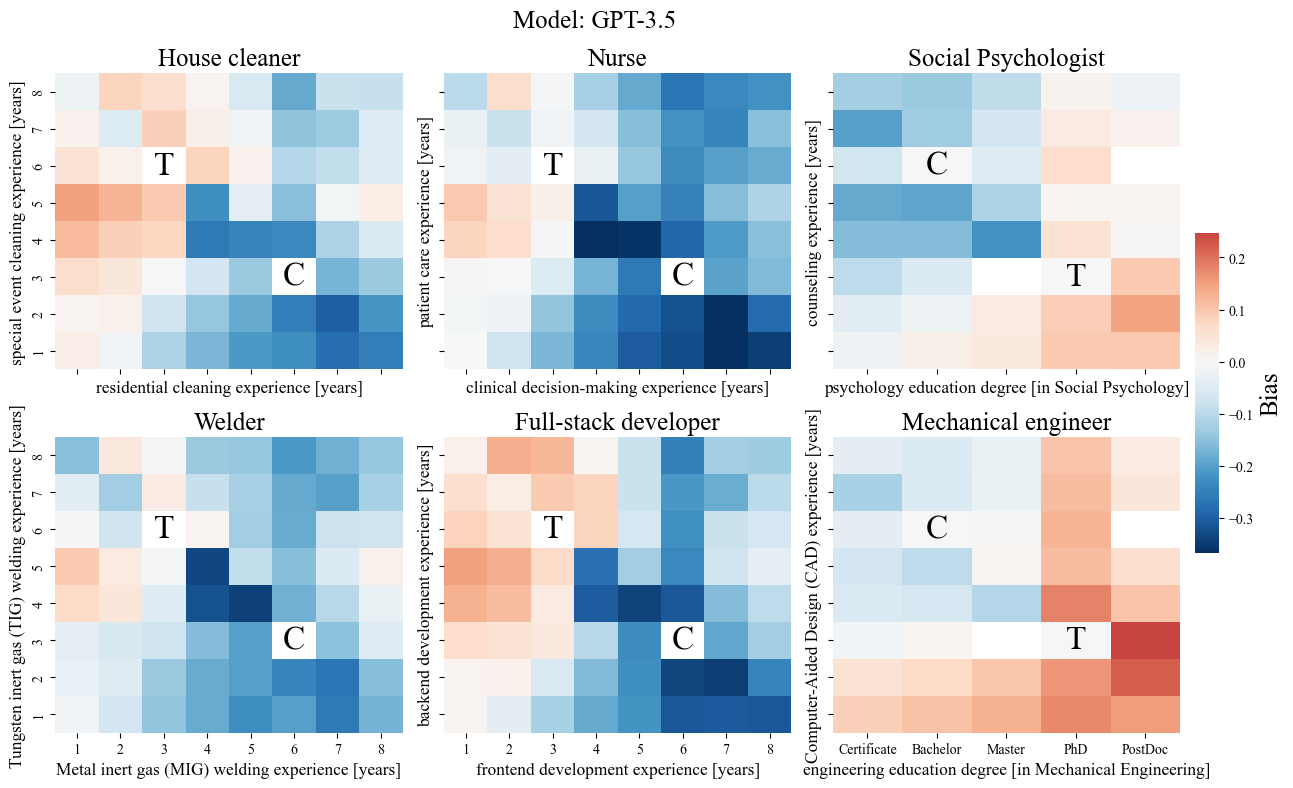

/Users/pencho.yordanov/Library/CloudStorage/OneDrive-Adecco/Documents/projects/llm_context_effects/LLMDecoy/notebooks/../src/analysis.py:481: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


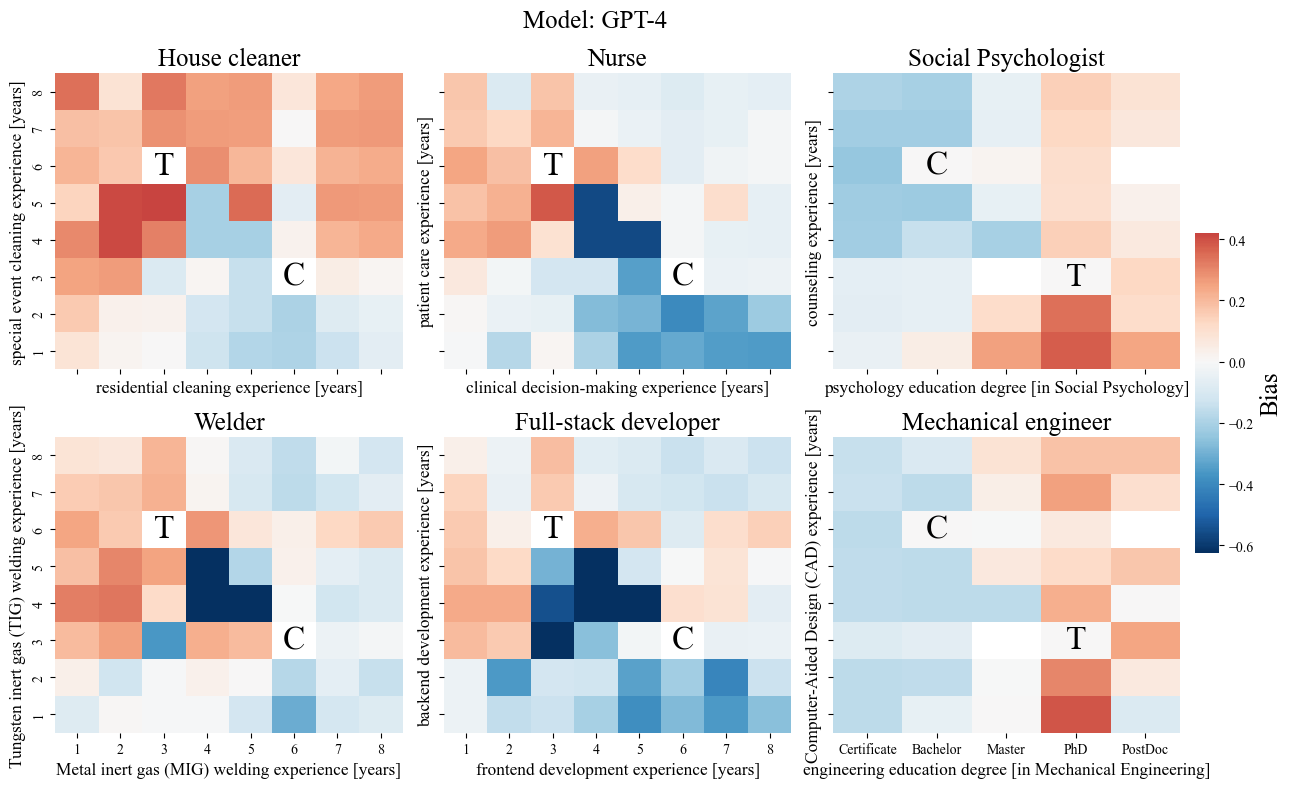

In [9]:
for model_filter in ModelDeployments:
    fig_2 = an.plot_bias_space(
        exp_2_result_files,
        model_filter=model_filter.value,
        tag="exp_2"
        )

### Experiment 3 - Gender decoys

#### Results

In [10]:
context_pronouns = ["his", "her"]
target_competitor_pronouns = [("his", "her"), ("her", "his")]

if GENERATE_RESULTS:
    exp_3_result_files = {}

    for target_pronoun, competitor_pronoun in target_competitor_pronouns:
        # Run across context pronouns
        for context_pronoun in context_pronouns:
            exp_params_0 = dict(
                tag_base = f"exp_3_{target_pronoun}_{competitor_pronoun}_{context_pronoun}",
                description="Gender effect.",
                context=["DECOY"],
                target_pronoun=target_pronoun,
                competitor_pronoun=competitor_pronoun,
                context_pronoun=context_pronoun,
                candidate_phantom_state=pl.candidate_phantom_state,
                job_phantom_requirement=pl.job_phantom_requirement,
                assume_phantom_in_choice_set=True,
                recruiter_instruction="mid_length_1",
                decoy_explanation=0,
                name_vocabulary=default_name_vocabulary,
                temperature=1.,
                num_samples=100,
            )
            
            exp_3_result_files_pronoun = []

            # Run across professions
            for job_title, job_details in pl.jobs_openings.items():
                output_file = run_exp_for_job(exp_params_0, job_title, job_details, llm_models=llm_models, gen_grid=False)
                
                exp_3_result_files_pronoun += [output_file]
            
            exp_3_result_files[(target_pronoun, competitor_pronoun, context_pronoun)] = exp_3_result_files_pronoun
        
    print("Experiment 3 result files:", exp_3_result_files)

    # Runtime: 191m 3.5s = ~3.2 hours
else:
    exp_3_result_files = {
        ('his', 'her', 'his'): [
            '../results/data/exp_3_his_her_his_Full-stack developer_choices.json', 
            '../results/data/exp_3_his_her_his_Welder_choices.json', 
            '../results/data/exp_3_his_her_his_Mechanical engineer_choices.json', 
            '../results/data/exp_3_his_her_his_Social Psychologist_choices.json', 
            '../results/data/exp_3_his_her_his_House cleaner_choices.json', 
            '../results/data/exp_3_his_her_his_Nurse_choices.json'], 
        ('his', 'her', 'her'): [
            '../results/data/exp_3_his_her_her_Full-stack developer_choices.json', 
            '../results/data/exp_3_his_her_her_Welder_choices.json', 
            '../results/data/exp_3_his_her_her_Mechanical engineer_choices.json', 
            '../results/data/exp_3_his_her_her_Social Psychologist_choices.json', 
            '../results/data/exp_3_his_her_her_House cleaner_choices.json', 
            '../results/data/exp_3_his_her_her_Nurse_choices.json'], 
        ('her', 'his', 'his'): [
            '../results/data/exp_3_her_his_his_Full-stack developer_choices.json', 
            '../results/data/exp_3_her_his_his_Welder_choices.json', 
            '../results/data/exp_3_her_his_his_Mechanical engineer_choices.json', 
            '../results/data/exp_3_her_his_his_Social Psychologist_choices.json', 
            '../results/data/exp_3_her_his_his_House cleaner_choices.json', 
            '../results/data/exp_3_her_his_his_Nurse_choices.json'], 
        ('her', 'his', 'her'): [
            '../results/data/exp_3_her_his_her_Full-stack developer_choices.json', 
            '../results/data/exp_3_her_his_her_Welder_choices.json', 
            '../results/data/exp_3_her_his_her_Mechanical engineer_choices.json', 
            '../results/data/exp_3_her_his_her_Social Psychologist_choices.json', 
            '../results/data/exp_3_her_his_her_House cleaner_choices.json', 
            '../results/data/exp_3_her_his_her_Nurse_choices.json']
        }

#### Analysis

In [11]:
# Analysis per job title
analysed_exp_3 = {}

for pronouns, exp_3_result_files_pronoun in exp_3_result_files.items():
    anaysed_exp_3_pronouns = an.analyse_results_contr_treat(
        exp_3_result_files_pronoun, 
        simulated_sample_size=100, 
        significance_threshold=pvalue_threshold,
        )
    
    analysed_exp_3[pronouns] = anaysed_exp_3_pronouns

    anaysed_exp_3_pronouns_df = pd.DataFrame(anaysed_exp_3_pronouns)
    display(anaysed_exp_3_pronouns_df)
    
    # fig_3 = an.plot_results_contr_treat(
    #     anaysed_exp_3_pronouns, 
    #     tag="exp_3"+"_".join(pronouns), 
    #     figsize=(6, 6),
    #     save=False,
    #     )

,model,experiment,chi^2_statistic,chi^2_pvalue,significant,chi^2_dof,CONTROL_TARGET_AVG_PROB,CONTROL_TARGET_SEM,CONTROL_TARGET_STD,CONTROL_bias_score,DECOY_TARGET_AVG_PROB,DECOY_TARGET_SEM,DECOY_TARGET_STD,DECOY_bias_score
0,gpt-35-turbo-instruct,Full-stack developer,9.483903,2.072826e-03,True,1,0.637088,0.078143,0.174733,0.0,0.721735,0.103260,0.230897,0.084647
1,gpt4,Full-stack developer,40.214283,2.275783e-10,True,1,0.573333,0.176100,0.393771,0.0,0.748333,0.132449,0.296165,0.175000
2,gpt-35-turbo-instruct,Welder,2.913642,8.783331e-02,False,1,0.612905,0.078959,0.176557,0.0,0.661949,0.112514,0.251588,0.049044
3,gpt4,Welder,190.632553,2.313448e-43,True,1,0.655000,0.162373,0.363077,0.0,0.968333,0.027859,0.062294,0.313333
4,gpt-35-turbo-instruct,Mechanical engineer,21.209341,4.117529e-06,True,1,0.173463,0.058899,0.131703,0.0,0.287070,0.083642,0.187028,0.113607
5,gpt4,Mechanical engineer,7.390734,6.556073e-03,True,1,0.171667,0.131869,0.294868,0.0,0.115000,0.073835,0.165101,-0.056667
6,gpt-35-turbo-instruct,Social Psychologist,0.586811,4.436548e-01,False,1,0.352464,0.110220,0.246459,0.0,0.375409,0.111169,0.248581,0.022946
7,gpt4,Social Psychologist,22.781250,1.815281e-06,True,1,0.531667,0.211067,0.471961,0.0,0.668333,0.209768,0.469056,0.136667
8,gpt-35-turbo-instruct,House cleaner,14.299624,1.558960e-04,True,1,0.585921,0.059489,0.133022,0.0,0.692436,0.103780,0.232059,0.106514
9,gpt4,House cleaner,179.931161,5.017077e-41,True,1,0.135000,0.080281,0.179513,0.0,0.496667,0.181891,0.406721,0.361667


,model,experiment,chi^2_statistic,chi^2_pvalue,significant,chi^2_dof,CONTROL_TARGET_AVG_PROB,CONTROL_TARGET_SEM,CONTROL_TARGET_STD,CONTROL_bias_score,DECOY_TARGET_AVG_PROB,DECOY_TARGET_SEM,DECOY_TARGET_STD,DECOY_bias_score
0,gpt-35-turbo-instruct,Full-stack developer,0.129567,7.188809e-01,False,1,0.637088,0.078143,0.174733,0.0,0.648712,0.102952,0.230208,0.011624
1,gpt4,Full-stack developer,36.432638,1.580346e-09,True,1,0.561667,0.177415,0.396712,0.0,0.730000,0.150555,0.336650,0.168333
2,gpt-35-turbo-instruct,Welder,0.882970,3.473894e-01,False,1,0.612883,0.078945,0.176526,0.0,0.584625,0.121843,0.272449,-0.028258
3,gpt4,Welder,150.648780,1.250702e-34,True,1,0.661667,0.162099,0.362465,0.0,0.945000,0.047452,0.106105,0.283333
4,gpt-35-turbo-instruct,Mechanical engineer,17.213339,3.340824e-05,True,1,0.173463,0.058899,0.131703,0.0,0.275037,0.073314,0.163935,0.101574
5,gpt4,Mechanical engineer,15.187973,9.732130e-05,True,1,0.173333,0.131242,0.293466,0.0,0.268333,0.156576,0.350115,0.095000
6,gpt-35-turbo-instruct,Social Psychologist,0.097173,7.552484e-01,False,1,0.352464,0.110220,0.246459,0.0,0.342228,0.087766,0.196252,-0.010236
7,gpt4,Social Psychologist,24.517097,7.365339e-07,True,1,0.530000,0.211896,0.473814,0.0,0.671667,0.206146,0.460956,0.141667
8,gpt-35-turbo-instruct,House cleaner,0.874509,3.497101e-01,False,1,0.585921,0.059489,0.133022,0.0,0.614038,0.098023,0.219187,0.028117
9,gpt4,House cleaner,83.680282,5.816247e-20,True,1,0.105000,0.070934,0.158614,0.0,0.323333,0.153724,0.343738,0.218333


,model,experiment,chi^2_statistic,chi^2_pvalue,significant,chi^2_dof,CONTROL_TARGET_AVG_PROB,CONTROL_TARGET_SEM,CONTROL_TARGET_STD,CONTROL_bias_score,DECOY_TARGET_AVG_PROB,DECOY_TARGET_SEM,DECOY_TARGET_STD,DECOY_bias_score
0,gpt-35-turbo-instruct,Full-stack developer,5.095047,2.399427e-02,False,1,0.576277,0.079370,0.177477,0.0,0.641539,0.101749,0.227518,0.065263
1,gpt4,Full-stack developer,20.317120,6.561088e-06,True,1,0.700000,0.150975,0.337589,0.0,0.813333,0.127166,0.284351,0.113333
2,gpt-35-turbo-instruct,Welder,9.128794,2.516176e-03,True,1,0.622573,0.087972,0.196712,0.0,0.534773,0.113811,0.254490,-0.087800
3,gpt4,Welder,167.334000,2.827964e-38,True,1,0.693333,0.136813,0.305923,0.0,0.973333,0.017826,0.039861,0.280000
4,gpt-35-turbo-instruct,Mechanical engineer,16.034926,6.218471e-05,True,1,0.188175,0.061409,0.137314,0.0,0.288333,0.073146,0.163559,0.100158
5,gpt4,Mechanical engineer,35.130936,3.082645e-09,True,1,0.168333,0.128385,0.287078,0.0,0.316667,0.197546,0.441726,0.148333
6,gpt-35-turbo-instruct,Social Psychologist,0.130351,7.180681e-01,False,1,0.367872,0.109026,0.243789,0.0,0.379623,0.099352,0.222158,0.011751
7,gpt4,Social Psychologist,24.285546,8.305999e-07,True,1,0.546667,0.205778,0.460133,0.0,0.686667,0.198589,0.444060,0.140000
8,gpt-35-turbo-instruct,House cleaner,1.259076,2.618261e-01,False,1,0.608005,0.065191,0.145770,0.0,0.641043,0.098450,0.220142,0.033038
9,gpt4,House cleaner,73.408469,1.054128e-17,True,1,0.216667,0.119657,0.267561,0.0,0.451667,0.154842,0.346238,0.235000


,model,experiment,chi^2_statistic,chi^2_pvalue,significant,chi^2_dof,CONTROL_TARGET_AVG_PROB,CONTROL_TARGET_SEM,CONTROL_TARGET_STD,CONTROL_bias_score,DECOY_TARGET_AVG_PROB,DECOY_TARGET_SEM,DECOY_TARGET_STD,DECOY_bias_score
0,gpt-35-turbo-instruct,Full-stack developer,15.808259,7.009588e-05,True,1,0.576277,0.079370,0.177477,0.0,0.688619,0.107908,0.241291,0.112343
1,gpt4,Full-stack developer,15.828723,6.934186e-05,True,1,0.708333,0.162838,0.364116,0.0,0.808333,0.116488,0.260475,0.100000
2,gpt-35-turbo-instruct,Welder,2.522651,1.122218e-01,False,1,0.622780,0.088089,0.196974,0.0,0.668311,0.113948,0.254795,0.045531
3,gpt4,Welder,172.710422,1.893259e-39,True,1,0.683333,0.149859,0.335095,0.0,0.971667,0.026384,0.058996,0.288333
4,gpt-35-turbo-instruct,Mechanical engineer,31.459165,2.036789e-08,True,1,0.188175,0.061409,0.137314,0.0,0.331889,0.086758,0.193998,0.143714
5,gpt4,Mechanical engineer,9.668990,1.874044e-03,True,1,0.168333,0.130803,0.292485,0.0,0.105000,0.093229,0.208467,-0.063333
6,gpt-35-turbo-instruct,Social Psychologist,3.697744,5.448610e-02,False,1,0.367872,0.109026,0.243789,0.0,0.423831,0.111537,0.249404,0.055960
7,gpt4,Social Psychologist,27.969962,1.232133e-07,True,1,0.543333,0.206182,0.461037,0.0,0.693333,0.195050,0.436145,0.150000
8,gpt-35-turbo-instruct,House cleaner,21.448600,3.634413e-06,True,1,0.608005,0.065191,0.145770,0.0,0.735242,0.104283,0.233185,0.127237
9,gpt4,House cleaner,138.418283,5.903538e-32,True,1,0.236667,0.124007,0.277288,0.0,0.571667,0.148625,0.332336,0.335000


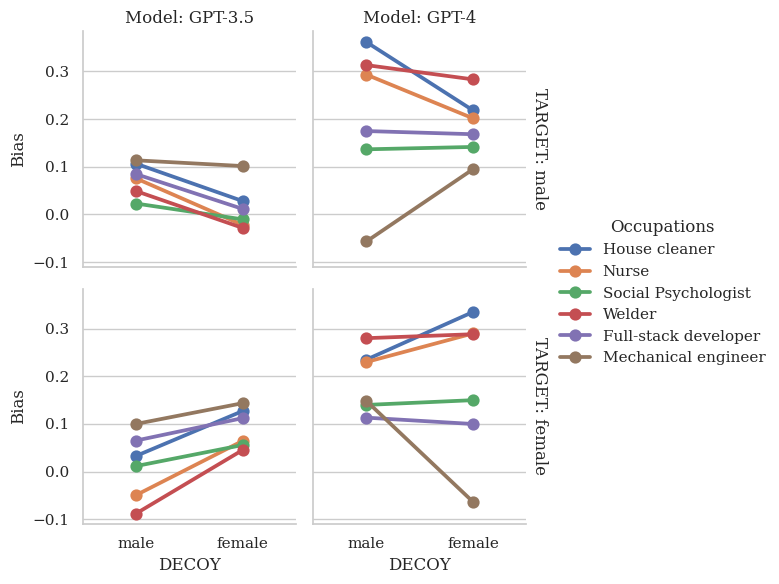

In [12]:
# Gender decoy effect
dfs_exp3_concat = an.vis_gender_effect(analysed_exp_3, tag="exp_3", figure_size=(5,2))

In [13]:
# Paired two-sided t-test
df_significance_exp3 = an.gender_effect_significance(
    dfs_exp3_concat, 
    significance_threshold=pvalue_threshold,
    reset_index=False
    )

display(df_significance_exp3)

t-statistic   p-value  significant
Model   TARGET                                    
GPT-3.5 female     4.897510  0.004484         True
        male      -4.694686  0.005363         True
GPT-4   female    -0.176302  0.866975        False
        male      -0.466163  0.660702        False

## Robustness of results

### Experiment 4 - Warning against the attraction effect

#### Results

In [14]:
if GENERATE_RESULTS:
    exp_4_result_files = {}

    for decoy_explanation in pl.decoy_effect_explanation.keys():
        exp_params_0 = dict(
            tag_base = f"exp_4_{decoy_explanation}",
            description="Decoy explanation.",
            context=["DECOY"],
            target_pronoun=neutral_pronoun,
            competitor_pronoun=neutral_pronoun,
            context_pronoun=neutral_pronoun,
            candidate_phantom_state=pl.candidate_phantom_state,
            job_phantom_requirement=pl.job_phantom_requirement,
            assume_phantom_in_choice_set=True,
            recruiter_instruction="mid_length_1",
            decoy_explanation=decoy_explanation,
            name_vocabulary=default_name_vocabulary,
            temperature=1.,
            num_samples=100,
        )
        
        exp_4_result_files_explanation = []

        # Run across professions
        for job_title, job_details in pl.jobs_openings.items():
            output_file = run_exp_for_job(exp_params_0, job_title, job_details, llm_models=llm_models, gen_grid=False)
            
            exp_4_result_files_explanation += [output_file]
        
        exp_4_result_files[decoy_explanation] = exp_4_result_files_explanation
        
    print("Experiment 4 result files:", exp_4_result_files)

    # Runtime: 109m 21.4s
else:
    exp_4_result_files = {
        0: [
            '../results/data/exp_4_0_Full-stack developer_choices.json', 
            '../results/data/exp_4_0_Welder_choices.json', 
            '../results/data/exp_4_0_Mechanical engineer_choices.json', 
            '../results/data/exp_4_0_Social Psychologist_choices.json', 
            '../results/data/exp_4_0_House cleaner_choices.json', 
            '../results/data/exp_4_0_Nurse_choices.json'
            ], 
        1: [
            '../results/data/exp_4_1_Full-stack developer_choices.json', 
            '../results/data/exp_4_1_Welder_choices.json', 
            '../results/data/exp_4_1_Mechanical engineer_choices.json', 
            '../results/data/exp_4_1_Social Psychologist_choices.json', 
            '../results/data/exp_4_1_House cleaner_choices.json', 
            '../results/data/exp_4_1_Nurse_choices.json'
            ]
        }

#### Analysis

In [15]:
# Analysis per job title
analysed_exp_4 = {}

decoy_explanation_dict = {
    0: "Absent",
    1: "Present",
    }

for decoy_explanation, exp_4_result_files_pronoun in exp_4_result_files.items():
    anaysed_exp_4_decoy_explanation = an.analyse_results_contr_treat(
        exp_4_result_files_pronoun, 
        simulated_sample_size=100, 
        significance_threshold=pvalue_threshold,
        )
    
    analysed_exp_4[decoy_explanation_dict[decoy_explanation]] = anaysed_exp_4_decoy_explanation

    anaysed_exp_4_decoy_explanation_df = pd.DataFrame(anaysed_exp_4_decoy_explanation)
    display(anaysed_exp_4_decoy_explanation_df)
    
    # fig_4 = an.plot_results_contr_treat(
    #     anaysed_exp_4_decoy_explanation, 
    #     tag=f"exp_4_{decoy_explanation}", 
    #     figsize=(6, 6),
    #     save=False,
    #     )

,model,experiment,chi^2_statistic,chi^2_pvalue,significant,chi^2_dof,CONTROL_TARGET_AVG_PROB,CONTROL_TARGET_SEM,CONTROL_TARGET_STD,CONTROL_bias_score,DECOY_TARGET_AVG_PROB,DECOY_TARGET_SEM,DECOY_TARGET_STD,DECOY_bias_score
0,gpt-35-turbo-instruct,Full-stack developer,20.960394,4.688770e-06,True,1,0.519526,0.073171,0.163616,0.0,0.651411,0.122076,0.272970,0.131884
1,gpt4,Full-stack developer,26.157402,3.146885e-07,True,1,0.620000,0.170607,0.381488,0.0,0.758333,0.131109,0.293168,0.138333
2,gpt-35-turbo-instruct,Welder,0.677177,4.105605e-01,False,1,0.570753,0.092833,0.207580,0.0,0.595843,0.126237,0.282275,0.025090
3,gpt4,Welder,178.022441,1.309829e-40,True,1,0.605000,0.174848,0.390971,0.0,0.931667,0.047358,0.105896,0.326667
4,gpt-35-turbo-instruct,Mechanical engineer,15.632683,7.691366e-05,True,1,0.200759,0.074455,0.166486,0.0,0.301413,0.084257,0.188404,0.100655
5,gpt4,Mechanical engineer,0.904338,3.416212e-01,False,1,0.146667,0.132857,0.297078,0.0,0.168333,0.113737,0.254324,0.021667
6,gpt-35-turbo-instruct,Social Psychologist,1.310262,2.523473e-01,False,1,0.370892,0.116502,0.260507,0.0,0.404760,0.118736,0.265503,0.033868
7,gpt4,Social Psychologist,15.824912,6.948166e-05,True,1,0.560000,0.202846,0.453578,0.0,0.673333,0.206667,0.462121,0.113333
8,gpt-35-turbo-instruct,House cleaner,18.499881,1.699149e-05,True,1,0.532287,0.066449,0.148584,0.0,0.655899,0.118347,0.264632,0.123612
9,gpt4,House cleaner,250.236885,2.305668e-56,True,1,0.180000,0.097707,0.218480,0.0,0.630000,0.149644,0.334614,0.450000


,model,experiment,chi^2_statistic,chi^2_pvalue,significant,chi^2_dof,CONTROL_TARGET_AVG_PROB,CONTROL_TARGET_SEM,CONTROL_TARGET_STD,CONTROL_bias_score,DECOY_TARGET_AVG_PROB,DECOY_TARGET_SEM,DECOY_TARGET_STD,DECOY_bias_score
0,gpt-35-turbo-instruct,Full-stack developer,0.005948,9.385239e-01,False,1,0.494462,0.084720,0.189441,0.0,0.498355,0.058205,0.130151,0.003893
1,gpt4,Full-stack developer,71.970577,2.184301e-17,True,1,0.495000,0.218430,0.488424,0.0,0.735000,0.160203,0.358225,0.240000
2,gpt-35-turbo-instruct,Welder,0.377111,5.391533e-01,False,1,0.517442,0.080245,0.179434,0.0,0.498050,0.075872,0.169654,-0.019392
3,gpt4,Welder,186.333763,2.007389e-42,True,1,0.423333,0.187913,0.420185,0.0,0.808333,0.162776,0.363979,0.385000
4,gpt-35-turbo-instruct,Mechanical engineer,10.974673,9.236554e-04,True,1,0.266682,0.051509,0.115178,0.0,0.356950,0.090148,0.201577,0.090267
5,gpt4,Mechanical engineer,43.510710,4.216453e-11,True,1,0.038333,0.023298,0.052095,0.0,0.151667,0.151667,0.339137,0.113333
6,gpt-35-turbo-instruct,Social Psychologist,17.496369,2.878569e-05,True,1,0.425572,0.083259,0.186173,0.0,0.547945,0.094135,0.210493,0.122373
7,gpt4,Social Psychologist,238.750261,7.365585e-54,True,1,0.925000,0.045516,0.101776,0.0,0.525000,0.186364,0.416723,-0.400000
8,gpt-35-turbo-instruct,House cleaner,0.077487,7.807325e-01,False,1,0.508185,0.090866,0.203183,0.0,0.517885,0.071334,0.159508,0.009700
9,gpt4,House cleaner,31.600690,1.893623e-08,True,1,0.375000,0.185378,0.414518,0.0,0.538333,0.198820,0.444575,0.163333


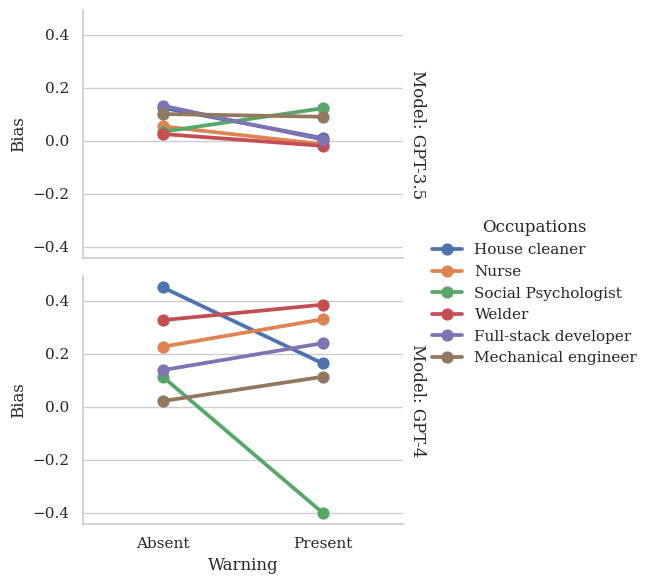

In [16]:
# decoy explanation effect
dfs_exp4_concat = an.vis_decoy_explanation_effect(analysed_exp_4, tag="exp_4", figure_size=(5,2))

In [18]:
# Paired two-sided t-test
df_significance_exp4 = an.decoy_explanation_effect_significance(
    dfs_exp4_concat, 
    significance_threshold=pvalue_threshold,
    reset_index=False
    )

display(df_significance_exp4)

,t-statistic,p-value,significant
Model,,,
GPT-3.5,1.426180,0.213150,False
GPT-4,0.691103,0.520269,False


### Experiment 5 - Varying the recruiter role definition

#### Results

In [ ]:
if GENERATE_RESULTS:
    exp_5_result_files = {}

    for recruiter_instruction in pl.recruiter_instructions.keys():
        exp_params_0 = dict(
            tag_base = f"exp_5_{recruiter_instruction}",
            description="Varying recruiter instructions.",
            context=["DECOY"],
            target_pronoun=neutral_pronoun,
            competitor_pronoun=neutral_pronoun,
            context_pronoun=neutral_pronoun,
            candidate_phantom_state=pl.candidate_phantom_state,
            job_phantom_requirement=pl.job_phantom_requirement,
            assume_phantom_in_choice_set=True,
            recruiter_instruction=recruiter_instruction,
            decoy_explanation=0,
            name_vocabulary=default_name_vocabulary,
            temperature=1.,
            num_samples=100,
        )
        
        exp_5_result_files_explanation = []

        # Run across professions
        for job_title, job_details in pl.jobs_openings.items():
            output_file = run_exp_for_job(exp_params_0, job_title, job_details, llm_models=llm_models, gen_grid=False)
            
            exp_5_result_files_explanation += [output_file]
        
        exp_5_result_files[recruiter_instruction] = exp_5_result_files_explanation
        
    print("Experiment 5 result files:", exp_5_result_files)

    # Runtime: ~215 min
else:
    exp_5_result_files = {
        'succinct': [
            '../results/data/exp_5_succinct_Full-stack developer_choices.json', 
            '../results/data/exp_5_succinct_Welder_choices.json', 
            '../results/data/exp_5_succinct_Mechanical engineer_choices.json', 
            '../results/data/exp_5_succinct_Social Psychologist_choices.json', 
            '../results/data/exp_5_succinct_House cleaner_choices.json', 
            '../results/data/exp_5_succinct_Nurse_choices.json',
            ],
        'mid_length_1': [
            '../results/data/exp_5_mid_length_1_Full-stack developer_choices.json', 
            '../results/data/exp_5_mid_length_1_Welder_choices.json', 
            '../results/data/exp_5_mid_length_1_Mechanical engineer_choices.json', 
            '../results/data/exp_5_mid_length_1_Social Psychologist_choices.json', 
            '../results/data/exp_5_mid_length_1_House cleaner_choices.json', 
            '../results/data/exp_5_mid_length_1_Nurse_choices.json',
            ],
        'mid_length_2': [
            '../results/data/exp_5_mid_length_2_Full-stack developer_choices.json', 
            '../results/data/exp_5_mid_length_2_Welder_choices.json', 
            '../results/data/exp_5_mid_length_2_Mechanical engineer_choices.json', 
            '../results/data/exp_5_mid_length_2_Social Psychologist_choices.json', 
            '../results/data/exp_5_mid_length_2_House cleaner_choices.json', 
            '../results/data/exp_5_mid_length_2_Nurse_choices.json',
            ],
        'verbose': [
            '../results/data/exp_5_verbose_Full-stack developer_choices.json', 
            '../results/data/exp_5_verbose_Welder_choices.json', 
            '../results/data/exp_5_verbose_Mechanical engineer_choices.json', 
            '../results/data/exp_5_verbose_Social Psychologist_choices.json', 
            '../results/data/exp_5_verbose_House cleaner_choices.json', 
            '../results/data/exp_5_verbose_Nurse_choices.json'
            ],
        }

#### Analysis

In [ ]:
# Analysis per job title
analysed_exp_5 = {}

recruiter_instruction_dict = {
    'succinct': "Succinct",
    'mid_length_1': "Concise-1",
    'mid_length_2': "Concise-2",
    'verbose': "Verbose",
    }

for recruiter_instruction, exp_5_result_files_pronoun in exp_5_result_files.items():
    anaysed_exp_5_recruiter_instruction = an.analyse_results_contr_treat(
        exp_5_result_files_pronoun, 
        simulated_sample_size=100, 
        significance_threshold=pvalue_threshold,
        )
    
    analysed_exp_5[recruiter_instruction_dict[recruiter_instruction]] = anaysed_exp_5_recruiter_instruction

    anaysed_exp_5_recruiter_instruction_df = pd.DataFrame(anaysed_exp_5_recruiter_instruction)
    display(anaysed_exp_5_recruiter_instruction_df)
    
    # fig_5 = an.plot_results_contr_treat(
    #     anaysed_exp_5_recruiter_instruction, 
    #     tag=f"exp_5_{recruiter_instruction}", 
    #     figsize=(6, 6),
    #     save=False,
    #     )

,model,experiment,chi^2_statistic,chi^2_pvalue,significant,chi^2_dof,CONTROL_TARGET_AVG_PROB,CONTROL_TARGET_SEM,CONTROL_TARGET_STD,CONTROL_bias_score,DECOY_TARGET_AVG_PROB,DECOY_TARGET_SEM,DECOY_TARGET_STD,DECOY_bias_score
0,gpt-35-turbo-instruct,Full-stack developer,29.448974,5.740841e-08,True,1,0.482933,0.086055,0.192426,0.0,0.640065,0.120889,0.270315,0.157132
1,gpt4,Full-stack developer,30.836584,2.806959e-08,True,1,0.568333,0.165074,0.369117,0.0,0.723333,0.111555,0.249444,0.155000
2,gpt-35-turbo-instruct,Welder,0.229039,6.322371e-01,False,1,0.572895,0.104182,0.232958,0.0,0.588197,0.126695,0.283298,0.015302
3,gpt4,Welder,77.308456,1.462386e-18,True,1,0.675000,0.161550,0.361236,0.0,0.886667,0.092724,0.207338,0.211667
4,gpt-35-turbo-instruct,Mechanical engineer,3.719741,5.377271e-02,False,1,0.262598,0.093981,0.210148,0.0,0.314722,0.100173,0.223994,0.052124
5,gpt4,Mechanical engineer,21.096559,4.367115e-06,True,1,0.276667,0.150569,0.336683,0.0,0.165000,0.113071,0.252834,-0.111667
6,gpt-35-turbo-instruct,Social Psychologist,0.000000,1.000000e+00,False,1,0.381698,0.133060,0.297532,0.0,0.380347,0.101821,0.227678,-0.001351
7,gpt4,Social Psychologist,1.406255,2.356791e-01,False,1,0.725000,0.175114,0.391567,0.0,0.756667,0.163170,0.364859,0.031667
8,gpt-35-turbo-instruct,House cleaner,10.927692,9.473746e-04,True,1,0.548255,0.075629,0.169112,0.0,0.643577,0.114228,0.255421,0.095322
9,gpt4,House cleaner,43.127287,5.129190e-11,True,1,0.210000,0.079791,0.178419,0.0,0.385000,0.145962,0.326382,0.175000


,model,experiment,chi^2_statistic,chi^2_pvalue,significant,chi^2_dof,CONTROL_TARGET_AVG_PROB,CONTROL_TARGET_SEM,CONTROL_TARGET_STD,CONTROL_bias_score,DECOY_TARGET_AVG_PROB,DECOY_TARGET_SEM,DECOY_TARGET_STD,DECOY_bias_score
0,gpt-35-turbo-instruct,Full-stack developer,20.960394,4.688770e-06,True,1,0.519526,0.073171,0.163616,0.0,0.651411,0.122076,0.272970,0.131884
1,gpt4,Full-stack developer,16.136014,5.895230e-05,True,1,0.623333,0.160076,0.357942,0.0,0.733333,0.133982,0.299592,0.110000
2,gpt-35-turbo-instruct,Welder,0.688597,4.066419e-01,False,1,0.569635,0.092362,0.206529,0.0,0.594930,0.124374,0.278108,0.025295
3,gpt4,Welder,126.420752,2.487388e-29,True,1,0.641667,0.151160,0.338005,0.0,0.913333,0.056960,0.127366,0.271667
4,gpt-35-turbo-instruct,Mechanical engineer,15.219465,9.571176e-05,True,1,0.200590,0.074324,0.166192,0.0,0.299813,0.082787,0.185118,0.099223
5,gpt4,Mechanical engineer,1.125266,2.887873e-01,False,1,0.135000,0.111647,0.249650,0.0,0.158333,0.117825,0.263465,0.023333
6,gpt-35-turbo-instruct,Social Psychologist,1.275221,2.587895e-01,False,1,0.370872,0.116511,0.260528,0.0,0.404303,0.118745,0.265521,0.033431
7,gpt4,Social Psychologist,16.314290,5.365779e-05,True,1,0.560000,0.202846,0.453578,0.0,0.675000,0.205585,0.459701,0.115000
8,gpt-35-turbo-instruct,House cleaner,18.499881,1.699149e-05,True,1,0.532287,0.066449,0.148584,0.0,0.655899,0.118347,0.264632,0.123612
9,gpt4,House cleaner,248.094857,6.757472e-56,True,1,0.191667,0.099446,0.222367,0.0,0.641667,0.148491,0.332035,0.450000


,model,experiment,chi^2_statistic,chi^2_pvalue,significant,chi^2_dof,CONTROL_TARGET_AVG_PROB,CONTROL_TARGET_SEM,CONTROL_TARGET_STD,CONTROL_bias_score,DECOY_TARGET_AVG_PROB,DECOY_TARGET_SEM,DECOY_TARGET_STD,DECOY_bias_score
0,gpt-35-turbo-instruct,Full-stack developer,31.857814,1.658810e-08,True,1,0.464142,0.080383,0.179742,0.0,0.628051,0.131515,0.294076,0.163909
1,gpt4,Full-stack developer,28.144626,1.125798e-07,True,1,0.525000,0.164007,0.366731,0.0,0.676667,0.147030,0.328769,0.151667
2,gpt-35-turbo-instruct,Welder,0.000000,1.000000e+00,False,1,0.572164,0.089939,0.201110,0.0,0.573279,0.124350,0.278056,0.001115
3,gpt4,Welder,132.211538,1.344961e-30,True,1,0.641667,0.146684,0.327995,0.0,0.918333,0.050094,0.112014,0.276667
4,gpt-35-turbo-instruct,Mechanical engineer,5.797922,1.604513e-02,False,1,0.238915,0.095316,0.213132,0.0,0.302346,0.091097,0.203699,0.063431
5,gpt4,Mechanical engineer,1.680902,1.948046e-01,False,1,0.135000,0.117693,0.263170,0.0,0.163333,0.163333,0.365224,0.028333
6,gpt-35-turbo-instruct,Social Psychologist,0.003455,9.531303e-01,False,1,0.418678,0.138830,0.310433,0.0,0.422020,0.120942,0.270435,0.003342
7,gpt4,Social Psychologist,0.196338,6.576933e-01,False,1,0.711667,0.174822,0.390914,0.0,0.698333,0.190900,0.426865,-0.013333
8,gpt-35-turbo-instruct,House cleaner,16.821577,4.106375e-05,True,1,0.535242,0.076672,0.171445,0.0,0.653185,0.122718,0.274406,0.117943
9,gpt4,House cleaner,120.153750,5.854285e-28,True,1,0.183333,0.109869,0.245674,0.0,0.483333,0.167922,0.375485,0.300000


,model,experiment,chi^2_statistic,chi^2_pvalue,significant,chi^2_dof,CONTROL_TARGET_AVG_PROB,CONTROL_TARGET_SEM,CONTROL_TARGET_STD,CONTROL_bias_score,DECOY_TARGET_AVG_PROB,DECOY_TARGET_SEM,DECOY_TARGET_STD,DECOY_bias_score
0,gpt-35-turbo-instruct,Full-stack developer,15.997191,6.343653e-05,True,1,0.489708,0.078477,0.175481,0.0,0.606302,0.129414,0.289380,0.116593
1,gpt4,Full-stack developer,6.635167,9.998480e-03,True,1,0.596667,0.151936,0.339738,0.0,0.670000,0.161286,0.360648,0.073333
2,gpt-35-turbo-instruct,Welder,4.027048,4.477623e-02,False,1,0.546962,0.096848,0.216559,0.0,0.605878,0.140618,0.314431,0.058916
3,gpt4,Welder,69.451118,7.833199e-17,True,1,0.658333,0.140462,0.314082,0.0,0.865000,0.123254,0.275605,0.206667
4,gpt-35-turbo-instruct,Mechanical engineer,18.716771,1.516429e-05,True,1,0.215735,0.086990,0.194515,0.0,0.328571,0.099619,0.222754,0.112835
5,gpt4,Mechanical engineer,71.129633,3.345080e-17,True,1,0.168333,0.131945,0.295038,0.0,0.023333,0.014981,0.033500,-0.145000
6,gpt-35-turbo-instruct,Social Psychologist,17.264296,3.252411e-05,True,1,0.356537,0.130078,0.290863,0.0,0.476465,0.135573,0.303150,0.119928
7,gpt4,Social Psychologist,3.041811,8.114533e-02,False,1,0.615000,0.198305,0.443424,0.0,0.665000,0.208738,0.466753,0.050000
8,gpt-35-turbo-instruct,House cleaner,3.430777,6.399197e-02,False,1,0.565467,0.070012,0.156552,0.0,0.619678,0.129993,0.290673,0.054212
9,gpt4,House cleaner,197.579794,7.046780e-45,True,1,0.160000,0.091177,0.203879,0.0,0.550000,0.151877,0.339608,0.390000


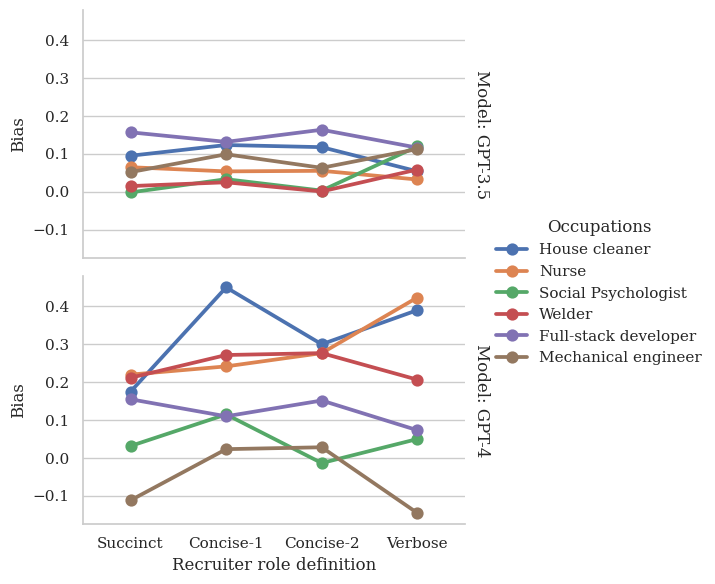

In [ ]:
# recruiter instruction variation effect
dfs_exp5_concat = an.vis_instruction_variation_effect(analysed_exp_5, tag="exp_5", figure_size=(10,2))

In [ ]:
# Repeated measures ANOVA
df_significance_exp5_df, df_significance_exp5_dict = an.instruction_variation_effect_significance(
    dfs_exp5_concat, 
    significance_threshold=pvalue_threshold,
    )

display(df_significance_exp5_df)
print(df_significance_exp5_dict)

# A one-way repeated measures ANOVA was conducted on 6 jobs to examine the effect that four different recruiter instrictions have on Bias. 
# Results showed that the type of recruiter instruction prompt used did not lead to statistically significant differences in Bias.

,F Value,Num DF,Den DF,Pr > F,Model,significant
Recruiter_role_definition,0.390738,3.0,15.0,0.761401,GPT-3.5,False
Recruiter_role_definition,1.407952,3.0,15.0,0.279303,GPT-4,False


{'GPT-3.5': 'F(3.0, 15.0) = 0.39073776993279136, p > 0.01', 'GPT-4': 'F(3.0, 15.0) = 1.4079517345562869, p > 0.01'}
